In [ ]:
!pip install qiskit

import math

from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.circuit import AncillaQubit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit import execute
from qiskit.circuit.library import MCMT

#!pip install Qconfig
#import Qconfig
#from IBMQuantumExperience import IBMQuantumExperience
#api = IBMQ(Qconfig.APItoken,
#{'url':Qconfig.config["url"]})
#from qiskit.backends import discover_remote_backends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.42.1-py3-n

In [ ]:
qc = QuantumCircuit(4,4)


n=4
c4z = MCMT('cz',n-1,1)

# Initialization
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘
c: 4/═════

In [ ]:
# CCCZ gate: Multi-controlled Z gate.
n=4
c4z = MCMT('cz',n-1,1)
c4z.draw()

q_0: ─■─
      │ 
q_1: ─■─
      │ 
q_2: ─■─
      │ 
q_3: ─■─

In [ ]:
# Oracle for 0010
qc.x(0)
qc.x(2)
qc.x(3)


qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(2)
qc.x(3)

qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_1: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_2: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 0000
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_2: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 0001
qc.x(1)
qc.x(2)
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(1)
qc.x(2)
qc.x(3)

qc.draw()

┌───┐             
q_0: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_2: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 0011
qc.x(2)
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(2)
qc.x(3)

qc.draw()

┌───┐             
q_0: ┤ H ├──────■──────
     ├───┤      │      
q_1: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_2: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 0100
qc.x(0)
qc.x(1)
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(1)
qc.x(3)

qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_2: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 0101
qc.x(1)
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(1)
qc.x(3)

qc.draw()

┌───┐             
q_0: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_2: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 0110
qc.x(0)
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(3)

qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_1: ┤ H ├──────■──────
     ├───┤      │      
q_2: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 0111
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(3)

qc.draw()

┌───┐             
q_0: ┤ H ├──────■──────
     ├───┤      │      
q_1: ┤ H ├──────■──────
     ├───┤      │      
q_2: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 1000
qc.x(0)
qc.x(1)
qc.x(2)


qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(1)
qc.x(2)

qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_2: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_3: ┤ H ├──────■──────
     └───┘             
c: 4/══════════════════

In [ ]:
# Oracle for 1001
qc.x(1)
qc.x(2)


qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(1)
qc.x(2)

qc.draw()

┌───┐             
q_0: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_2: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_3: ┤ H ├──────■──────
     └───┘             
c: 4/══════════════════

In [ ]:
# Oracle for 1010
qc.x(0)
qc.x(2)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(2)

qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_1: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_2: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_3: ┤ H ├──────■──────
     └───┘             
c: 4/══════════════════

In [ ]:
# Oracle for 1011
qc.x(3)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(3)

qc.draw()

┌───┐             
q_0: ┤ H ├──────■──────
     ├───┤      │      
q_1: ┤ H ├──────■──────
     ├───┤      │      
q_2: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_3: ┤ H ├┤ X ├─■─┤ X ├
     └───┘└───┘   └───┘
c: 4/══════════════════

In [ ]:
# Oracle for 1100
qc.x(0)
qc.x(1)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(1)

qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_2: ┤ H ├──────■──────
     ├───┤      │      
q_3: ┤ H ├──────■──────
     └───┘             
c: 4/══════════════════

In [ ]:
# Oracle for 1101
qc.x(1)

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(1)

qc.draw()

┌───┐             
q_0: ┤ H ├──────■──────
     ├───┤┌───┐ │ ┌───┐
q_1: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_2: ┤ H ├──────■──────
     ├───┤      │      
q_3: ┤ H ├──────■──────
     └───┘             
c: 4/══════════════════

In [ ]:
# Oracle for 1110
qc.x(0)
qc.compose(c4z,qubits=[0,1,2,3],inplace=True)
qc.x(0)
qc.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├
     ├───┤└───┘ │ └───┘
q_1: ┤ H ├──────■──────
     ├───┤      │      
q_2: ┤ H ├──────■──────
     ├───┤      │      
q_3: ┤ H ├──────■──────
     └───┘             
c: 4/══════════════════

In [ ]:
# Oracle for 1111

qc.compose(c4z,qubits=[0,1,2,3],inplace=True)
qc.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     ├───┤ │ 
q_2: ┤ H ├─■─
     ├───┤ │ 
q_3: ┤ H ├─■─
     └───┘   
c: 4/════════

In [ ]:
# Amplification
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)


qc.compose(c4z,qubits=[0,1,2,3],inplace=True)

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)


qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

In [ ]:
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐
q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤├───┤
q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤├───┤
q_2: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤├───┤
q_3: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├
     └───┘   └───┘└───┘   └───┘└───┘
c: 4/═══════════════════════════════

In [ ]:
qc.measure([0,1,2,3],[0,1,2,3])
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐┌─┐         
q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├┤M├─────────
     ├───┤ │ ├───┤├───┤ │ ├───┤├───┤└╥┘┌─┐      
q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫─┤M├──────
     ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫──╫─┤M├───
     ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘   └───┘└───┘   └───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════╩══╩══╩══╩═
                                     0  1  2  3

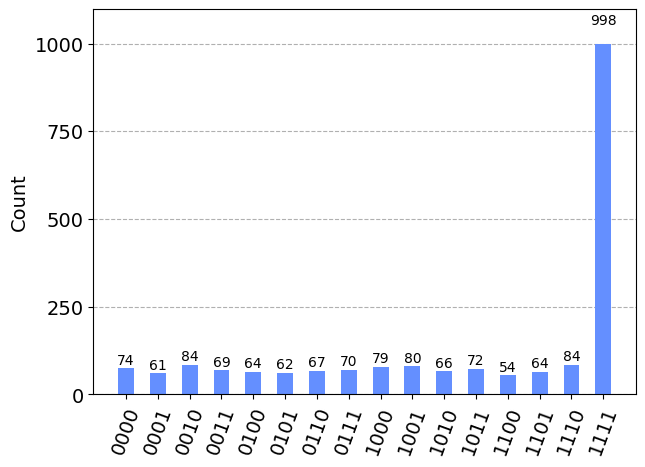

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 2048)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)